In [4]:
#This is the Steps we will do in Zad Project(Movie_Revenue_Analysis)
#Step 1:Import Libraries
#step 2:Load and Explore Data
#step 3:Data Cleaning
#step 4:Exploratory Data Analysis
#step 5:Prepare Data for Modeling
#step 6:Train Machine Learning Model
#step 7:Evaluate Model Performance
#step 8:Make New Predictions

In [21]:
#Step 1:Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#step 2:Load and Explore Data
#Load the data from the CSV file
df = pd.read_csv(r'D:\movie-revenue-predictor\data\raw\tmdb_5000_movies.csv')

#Take a first look
print("Shape of the data:", df.shape) # Shows (number of rows, number of columns)
print(df.info()) # Shows columns, data types, and missing values
print(df.head(5)) # Shows the first 5 rows of the dataframe

Shape of the data: (4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   obje

In [26]:
#step 3:Data Cleaning
df = df[['budget', 'genres', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']].copy()
df = df[(df['revenue'] > 0) & (df['budget'] > 0)].dropna()

# I did this functioon to get only the important inforamiton which is genre names instead of genre name and id and name for each row 
def extract_genres(genre_str):
    try:
        return [g['name'] for g in ast.literal_eval(genre_str)]
    except:
        return []
df['genres_list'] = df['genres'].apply(extract_genres)

#Converting genres to numbers the model can understand
#If this movie has this genre, put 1 in the column, otherwise put 0(one-hot encoding )
top_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure'] 
for genre in top_genres:
    df[f'genre_{genre}'] = df['genres_list'].apply(lambda x: 1 if genre in x else 0)
    
# I will see how many movies are here after filteration     
print(f"Clean data shape: {df.shape}")



Clean data shape: (3229, 13)


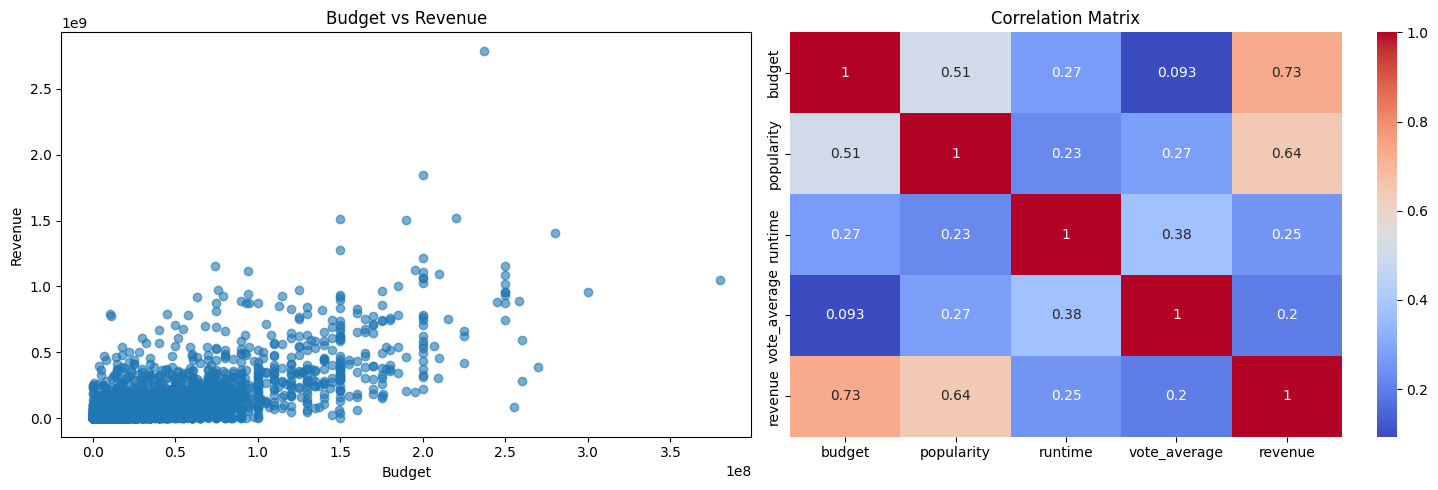

In [12]:
#step 4:Exploratory Data Analysis
#first chart(scatter plot)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Budget vs Revenue (Each dot represents one movie)
#X-position = movie's budget
#Y-position = movie's revenue
axes[0].scatter(df['budget'], df['revenue'], alpha=0.6)
axes[0].set(xlabel='Budget', ylabel='Revenue', title='Budget vs Revenue')


#second chart(Correlation heatmap)
#Correlation measures how two variables move together (-1 to +1)
#+1 = perfect positive relationship (when one goes up, the other goes up)
#-1 = perfect negative relationship (when one goes up, the other goes down)
#0 = no relationship
#annot=True shows the actual correlation numbers
#cmap='coolwarm' uses blue for negative, red for positive
numeric_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'revenue']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [27]:
#step 5:Prepare Data for Modeling
#Creating a list of all the input features we'll use to predict revenue
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count'] + [f'genre_{g}' for g in top_genres]
#X= Input features (what we know about the movie),y= Target variable (what we want to predict(revenue))
X = df[features]
y = df['revenue']
#Splitting our data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (2583, 10), Test shape: (646, 10)


In [28]:
#step 6:Train Machine Learning Model
#i will choose the algorithm i will use(Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MAE: $58,790,127.30
R² Score: 0.723


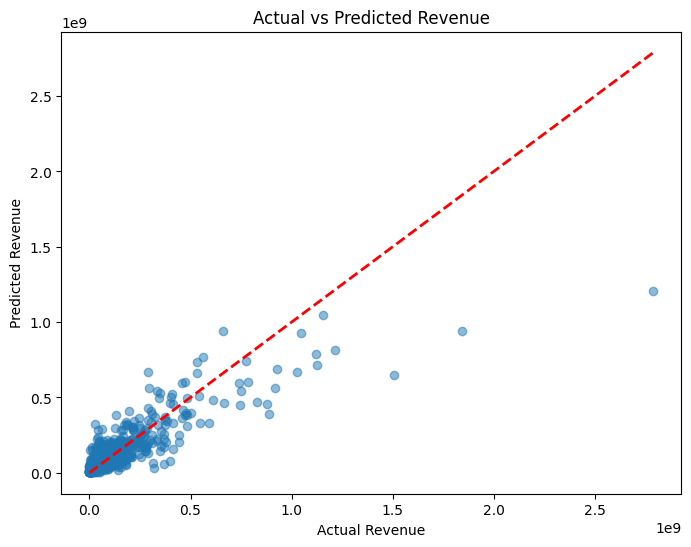

In [31]:
#step 7:Evaluate Model Performance
#Testing the model on our exam data (the test set)
y_pred = model.predict(X_test)
#Calculating Mean Absolute Error and R-squared score
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

#Not important to do (Making a visual check of our predictions)
#Each dot represents one movie's actual revenue vs predicted revenue
#The red dashed line represents perfect predictions
#If dots are close to the line = good predictions
#If dots are scattered everywhere = bad predictions
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

In [39]:
#step 8:Make New Predictions
# First, let's check what features the model expects
print("Model was trained with these features:")
print(model.feature_names_in_)

# Creating data for a new, hypothetical movie.
new_movie = {
    'budget': [150000000],
    'popularity': [350],
    'runtime': [120],
    'vote_average': [7.2], 
    'vote_count': [8000],
    'genre_Action': [1],
    'genre_Adventure': [1],
    'genre_Comedy': [0],
    'genre_Drama': [0],
    'genre_Thriller': [0]
}

#Convert to DataFrame
new_movie_df = pd.DataFrame(new_movie)

# Ensure the columns are in the EXACT same order as training
new_movie_df = new_movie_df[model.feature_names_in_]

print("New movie data (in correct order):")
print(new_movie_df)

# Use the trained model to make the actual prediction!
prediction = model.predict(new_movie_df)[0]  # [0] gets the first prediction

# Displaying the final prediction in a nice dollar format!
print(f"Predicted Revenue: ${prediction:,.2f}")

Model was trained with these features:
['budget' 'popularity' 'runtime' 'vote_average' 'vote_count' 'genre_Drama'
 'genre_Comedy' 'genre_Thriller' 'genre_Action' 'genre_Adventure']
New movie data (in correct order):
      budget  popularity  runtime  vote_average  vote_count  genre_Drama  \
0  150000000         350      120           7.2        8000            0   

   genre_Comedy  genre_Thriller  genre_Action  genre_Adventure  
0             0               0             1                1  
Predicted Revenue: $890,520,398.43


In [ ]:
#Till now for my fisrt real project we have done the following 
#Data Preparation (Steps 1-3): Cleaning and organizing your data
#Exploration (Step 4): Understanding your data through visualization
#Modeling (Steps 5-6): Choosing an algorithm and training it
#Evaluation (Step 7): Testing how good your model really is
#Deployment (Step 8): Using your model to make actual predictions